In [1]:
#Importing all libraries

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report

# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# NLTK and TextBlob libraries
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, download_corpora

# Imbalanced-learn library
from imblearn.over_sampling import SMOTE

In [2]:
# Download NLTK corpora
nltk.download('stopwords')
nltk.download('wordnet')
download_corpora.download_all()
nltk.download('omw-1.4')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data]

True

# Semantic Analysis
Semantic Analysis is a Natural Language Processing approach. It refers to analyzing the relationship of words, sentences and entire text within a give context (Nitin Indurkhya and Damerau, 2010). Using Neural Network model goes beyond analyzing only the meaning and grammar of words. It requires a set of process to extract insights and analyse the sentiment on each sentence.

This approach can be useful when apply to businesses that deal with customer satisfaction extracting information from unstructured data. Booking.com was used to retrieve information from a Hotel and gather guests reviews from 2021 to 2023.

The use of TensorFlow and Keras was the choice for applying the model after going through a set of tasks aiming the best model performance accuracy.

In [3]:
file_path = 'reviews.csv'
data_review = pd.read_csv(file_path)


In [4]:
data_review.head()

,Review date,Guest name,Reservation Number,Review title,Positive review,Negative review,Review score,Staff,Cleanliness,Location,Facilities,Comfort,Value for money,Property reply
0,2021-05-26 13:52:54,Sarah,2.916039e+09,Great stay,"Lovely staff, lovely clean hotel, great food",NaN,10.0,10.0,10.0,7.5,10.0,10.0,10.0,Thank you for taking the time to share your re...
1,2021-05-26 17:25:42,Diana,3.068738e+09,NaN,Location,NaN,9.0,10.0,7.5,10.0,10.0,10.0,10.0,"Dear Diana,\nThank you for the 9/10 rating.\nI..."
2,2021-05-27 13:25:33,ryane,2.505493e+09,Great hotel with helpful friendly staff.,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN
3,2021-05-28 09:27:09,lorraine,3.332737e+09,NaN,The room was spotless and the food was fabulous.,NaN,9.0,10.0,7.5,10.0,10.0,10.0,10.0,"Dear Lorraine,\nThanks for the great review of..."
4,2021-05-30 17:15:46,Mike,2.650766e+09,NaN,"Great location, excellent food and friendly st...",NaN,10.0,10.0,10.0,10.0,7.5,10.0,10.0,"Dear Mike, \nThank you for the great review an..."


In [5]:
data_review = data_review.drop(['Review date', 'Guest name', 'Reservation Number','Review title','Staff','Cleanliness','Location','Facilities','Comfort','Value for money','Property reply' ], axis=1)
data_review.dropna(inplace=True)

## Applying Lemmatizer
In the context of tokenization, another useful technique is word stemming, which is the process of
transforming a word into its root form. It allows us to map related words to the same stem (Raschka and Mirjalili, 2019).
The choice for WordNetLemmatizer() is the fact that it works better with different languages, which is very important in our case as we are dealing with hotel reviews and contain reviews in different languages.

In [6]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    return ' '.join(lemmatized_words)

In [7]:
# merging reviews
data_review['Review'] = data_review['Positive review'].fillna('') + ' ' + data_review['Negative review'].fillna('')

In [8]:
# Apply lemmatization to the 'Review' column
data_review['Review'] = data_review['Review'].apply(lemmatize_text)

In [9]:
data_review.head()

,Positive review,Negative review,Review score,Review
5,Everything was amazing staff room bar staff ð,Everything was great amazing time,10.0,Everything be amaze staff room bar staff ð ...
7,Location is great. Room was very clean and com...,Staff trying to come into our room with no rea...,8.0,Location be great. Room be very clean and comf...
8,Spotless clean food was great and staff where ...,Nothing got what you paid for couldn’t fault it,10.0,Spotless clean food be great and staff where v...
9,I really loved the room it was lovely and clean,I liked everything!!,10.0,I really love the room it be lovely and clean ...
10,"Convenient location, clean and tidy with excel...",A little run down looking from the outside. Co...,8.0,"Convenient location, clean and tidy with excel..."


## Applying TextBlob
TextBlob is an open-source library in Python for processing textual data. It is a powerful package that simplifies the complexity of contextual data and extracts in-depth information from the text (Analytics Vidhya, 2018). TextBlob can handle a lot of different tasks such as Tokenization, Word frequencies, Lemmatization, Spelling correction, and so on. In our sentiment analysis case, TextBlob is useful for determining whether the input textual data has a positive, negative, or neutral tone.

In [10]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [11]:
# Apply sentiment analysis to 'Review' column
data_review['Review Sentiment'] = data_review['Review'].apply(get_sentiment)

In [12]:
data_review.head()

,Positive review,Negative review,Review score,Review,Review Sentiment
5,Everything was amazing staff room bar staff ð,Everything was great amazing time,10.0,Everything be amaze staff room bar staff ð ...,Positive
7,Location is great. Room was very clean and com...,Staff trying to come into our room with no rea...,8.0,Location be great. Room be very clean and comf...,Positive
8,Spotless clean food was great and staff where ...,Nothing got what you paid for couldn’t fault it,10.0,Spotless clean food be great and staff where v...,Positive
9,I really loved the room it was lovely and clean,I liked everything!!,10.0,I really love the room it be lovely and clean ...,Positive
10,"Convenient location, clean and tidy with excel...",A little run down looking from the outside. Co...,8.0,"Convenient location, clean and tidy with excel...",Positive


In [13]:
data_review['Review Sentiment'].value_counts()

Review Sentiment
Positive    1112
Neutral      292
Negative     107
Name: count, dtype: int64

### Visualizing Findings

In [14]:
data_review['Review score'] = data_review['Review score'].round().astype(int)

<Axes: xlabel='Review score', ylabel='count'>

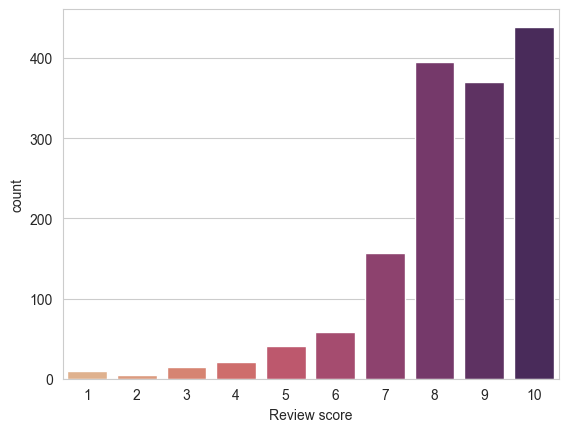

In [15]:
# Visualization 
sns.set_style('whitegrid')
sns.countplot(x='Review score',hue='Review score',data=data_review, palette='flare', legend=False)

<Axes: xlabel='Review Sentiment', ylabel='count'>

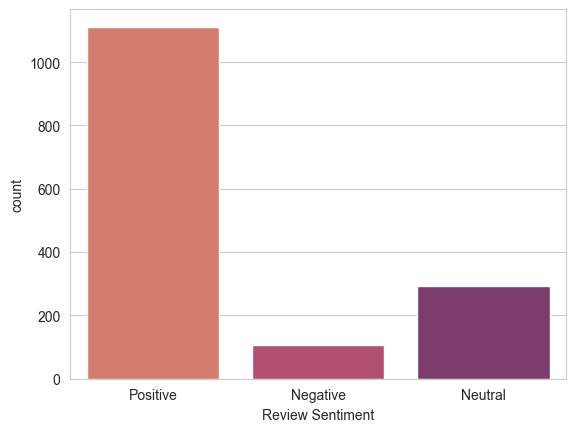

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Review Sentiment',hue='Review Sentiment',data=data_review, palette='flare', legend=False)

## Data Processing
We will now remove all punctuation marks, lower all the letters, remove stopwords (e.g. the, and, is),and the Unicode emoji formats (e.g. Ã°ÂŸÂ‘Â, meaning "thumbs up") found in our dataset. To accomplish this task, we will use Python's regular expression (regex) library, re , as shown below:

In [17]:
def get_text_processing(text):
    # Remove unwanted characters and keep only letters and numbers
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    stpword = stopwords.words('english')
    words = text.split()
    return ' '.join([word for word in words if word not in stpword])

In [18]:
data_review['Review'] = data_review['Review'].apply(get_text_processing)

In [19]:
data_review.head()

,Positive review,Negative review,Review score,Review,Review Sentiment
5,Everything was amazing staff room bar staff ð,Everything was great amazing time,10,everything amaze staff room bar staff everythi...,Positive
7,Location is great. Room was very clean and com...,Staff trying to come into our room with no rea...,8,location great room clean comfortable short st...,Positive
8,Spotless clean food was great and staff where ...,Nothing got what you paid for couldn’t fault it,10,spotless clean food great staff welcome helpfu...,Positive
9,I really loved the room it was lovely and clean,I liked everything!!,10,really love room lovely clean like everything,Positive
10,"Convenient location, clean and tidy with excel...",A little run down looking from the outside. Co...,8,convenient location clean tidy excellent staff...,Positive


In [20]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 5 to 5284
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Positive review   1511 non-null   object
 1   Negative review   1511 non-null   object
 2   Review score      1511 non-null   int32 
 3   Review            1511 non-null   object
 4   Review Sentiment  1511 non-null   object
dtypes: int32(1), object(4)
memory usage: 64.9+ KB


In [21]:
data_model = data_review[['Review', 'Review Sentiment']]

## One-Hot-Encoding
The get_dummies function is a very simple way to encode the data. The get_dummies function automatically transforms all columns that are categorical. This method simply convert categorical variable into numerical, creating a binary column for each category indicating the presence or absence of that category (Müller and Guido, 2017).

In [22]:
one_hot = pd.get_dummies(data_model["Review Sentiment"])
data_model.drop(['Review Sentiment'],axis=1,inplace=True)
data_model = pd.concat([data_model,one_hot],axis=1)
data_model.head()

C:\Users\35383\AppData\Local\Temp\ipykernel_29672\2024612391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.drop(['Review Sentiment'],axis=1,inplace=True)


,Review,Negative,Neutral,Positive
5,everything amaze staff room bar staff everythi...,False,False,True
7,location great room clean comfortable short st...,False,False,True
8,spotless clean food great staff welcome helpfu...,False,False,True
9,really love room lovely clean like everything,False,False,True
10,convenient location clean tidy excellent staff...,False,False,True


In [23]:
data_model.head()

,Review,Negative,Neutral,Positive
5,everything amaze staff room bar staff everythi...,False,False,True
7,location great room clean comfortable short st...,False,False,True
8,spotless clean food great staff welcome helpfu...,False,False,True
9,really love room lovely clean like everything,False,False,True
10,convenient location clean tidy excellent staff...,False,False,True


### Spliting Training and Test

In [24]:
X = data_model['Review'].values
y = data_model.drop('Review', axis=1).values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Tf-idf
The term frequency–inverse document frequency (tf–idf) is a common method in text classification . The function of this method is to give high weight to any term that appears often in a particular document.

There are two ways of applying the Tf-idf. Either applying CountVectorizer, which will produce a sparse matrix and use TfidfTransformer. Otherwise, TfidfVectorizer, which takes in the text data and does both the bag-of-words feature extraction and the tf–idf transformation. (Raschka and Mirjalili, 2019)

In [26]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [27]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [29]:
# Verify the distribution
print(f"Original dataset shape: {Counter(np.argmax(y_train, axis=1))}")
print(f"Resampled dataset shape: {Counter(np.argmax(y_resampled, axis=1))}")

Original dataset shape: Counter({2: 891, 1: 236, 0: 81})
Resampled dataset shape: Counter({2: 891, 1: 891, 0: 891})


In [30]:
# Combine the resampled data into a DataFrame (Note: X_resampled needs to be converted to a dense format)
data_balanced = pd.DataFrame(X_resampled.toarray(), columns=vect.get_feature_names_out())
data_balanced = pd.concat([data_balanced, pd.DataFrame(y_resampled, columns=one_hot.columns)], axis=1)

## Defining Keras Model
We created a Sequential model (https://keras.io/models/sequential/) and added layers one at a time doing tests with as many combinations as we can until we are happy with our network architecture. The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to the shape of our dataset after all preparation. We ended up with three hidden layers (128, 64, and 32), and an output layer of 3, meaning we can get three possible solution (Positive, Negative and Neutral).

We used activation function referred to as 'ReLU' on the three hidden layers and the 'softmax' function in the output layer. Softmax activation in the last layer is used to support multi-class classification, since here we have three class labels (which is why we have three neurons at the output layer)(Raschka and Mirjalili, 2019).

We specified the loss function as 'categorical_crossentropy' to evaluate a set of weights, the optimizer was 'Adam', and the metric was 'accuracy'. An early stop function was used to avoid overfitting when training the model.

In [31]:
model = Sequential()

model.add(Dense(units=128, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

C:\Users\35383\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Train the model 
history = model.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=20, batch_size=256, verbose=1, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3694 - loss: 1.0983 - val_accuracy: 0.3861 - val_loss: 1.0953
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5148 - loss: 1.0761 - val_accuracy: 0.7261 - val_loss: 1.0634
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6483 - loss: 1.0197 - val_accuracy: 0.8185 - val_loss: 0.9746
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7652 - loss: 0.8800 - val_accuracy: 0.8680 - val_loss: 0.7659
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8420 - loss: 0.6491 - val_accuracy: 0.8680 - val_loss: 0.5268
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8841 - loss: 0.4416 - val_accuracy: 0.8713 - val_loss: 0.3966
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9387 - loss: 0.2585 - val_accuracy: 0.8812 - val_loss: 0.3693
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9562 - loss: 0.1709 - val_accuracy: 0.8779 - v

In [33]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


# Conclusion
### Confusion Matrix
A confusion matrix is simply a square matrix that reports the counts of the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions of a classifier, which is represented by a matrix nxn with the rows being labeled with the classes and the columns labeled with the predicted classes (Provost and Fawcett, 2013). In this study, we will deal with a 3x3 Matrix, as we have 3 classes in our target value.

### Results
After the model is fit, the model evalutation performed with an accuracy of 87%, which seems to be a good model. We can see by looking at the confusion matrix that most prediction are correctly predicted.

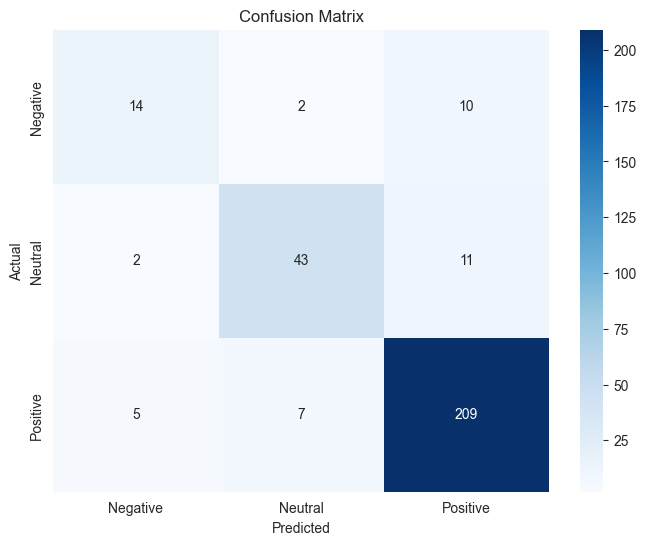

              precision    recall  f1-score   support

    Negative       0.67      0.54      0.60        26
     Neutral       0.83      0.77      0.80        56
    Positive       0.91      0.95      0.93       221

    accuracy                           0.88       303
   macro avg       0.80      0.75      0.77       303
weighted avg       0.87      0.88      0.87       303



In [34]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=one_hot.columns, yticklabels=one_hot.columns)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=one_hot.columns))

# References

1. Analytics Vidhya (2018). Natural Language Processing for Beginners: Using TextBlob. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/.

2. Andriy Burkov (2019). THE HUNDRED-PAGE MACHINE LEARNING BOOK. Andriy Burkov

3. Grus, J. (2015). Data Science from Scratch. ‘O’Reilly Media, Inc.’

4. Hastie, T., Tibshirani, R. and Friedman, J.H. (2009). The Elements of Statistical Learning. Springer.

5. IBM (2023). What is Random Forest? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/random-forest.

6. IBM (2024). AI vs. machine learning vs. deep learning vs. neural networks | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/think/topics/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks.

7. Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.

8. Nitin Indurkhya and Damerau, F.J. (2010). Handbook of natural language processing. Boca Raton, Fl: Chapman & Hall/Crc.

9. Oppermann, A. (2021). Activation Functions in Deep Learning: Sigmoid, tanh, ReLU. [online] KI Tutorials. Available at: https://artemoppermann.com/activation-functions-in-deep-learning-sigmoid-tanh-relu/#:~:text=Activation%20functions%20add%20a%20nonlinear [Accessed 30 May 2024].

10. Provost, F. and Fawcett, T. (2013). Data science for business : what you need to know about data mining and data-analytic thinking. Sebastopol, CA: O’Reilly Media.

11. Raschka, S. and Mirjalili, V. (2019). Python machine learning : machine learning and deep learning with python, scikit-learn, and tensorflow 2. Birmingham: Packt Publishing, Limited.


### MODELS

12. Chollet, F. (2020). The Sequential model. [online] keras.io. Available at: https://keras.io/guides/sequential_model/.

13. scikit-learn.org. (n.d.). 3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.23.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.

14. scikit-learn developers (2019). sklearn.linear_model.LinearRegression — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.
